<a href="https://colab.research.google.com/github/owaisahmad315/pandas/blob/main/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd



In [5]:
songs_66 = pd.Series([3, None , 11, 9],
                     index=['George', 'Ringo', 'John', 'Paul'],
                    name='Counts')
songs_66


George     3.0
Ringo      NaN
John      11.0
Paul       9.0
Name: Counts, dtype: float64

In [6]:
# One of the most basic measurements is the sum of the values in a series:
songs_66.sum()

23.0

In [7]:
songs_66.mean()

7.666666666666667

In [8]:
songs_66.median()

9.0

In [9]:
songs_66.quantile()

9.0

In [10]:
songs_66.quantile(.1)

4.2

In [11]:
songs_66.quantile(.9)

10.6

In [12]:
"""
To get a good overall feel for the series, the .describe method presents
a good number of summary statistics and returns the result as a series. It
includes the count of values, their mean, standard deviation, minimum and
maximum values, and the 25%, 50%, and 75% quantiles:
"""

songs_66.describe()

count     3.000000
mean      7.666667
std       4.163332
min       3.000000
25%       6.000000
50%       9.000000
75%      10.000000
max      11.000000
Name: Counts, dtype: float64

In [13]:
"""
You can pass in specific percentiles if you so desire with the
percentiles parameter:
"""
songs_66.describe(percentiles= [0.5, .1, .2])

count     3.000000
mean      7.666667
std       4.163332
min       3.000000
10%       4.200000
20%       5.400000
50%       9.000000
max      11.000000
Name: Counts, dtype: float64

In [14]:
"""
The series also has methods to find the minimum and maximum for the
values, .min and .max. In addition, there are methods to get the index
location of the minimum and maximum index labels, .idxmin and
.idxmax:

"""
songs_66.min()

3.0

In [15]:
songs_66.idxmin()

'George'

In [16]:
songs_66.max()

11.0

In [17]:
songs_66.idxmax()

'John'

In [18]:
# Variance
songs_66.var()

17.333333333333336

In [19]:
# standard deviation
songs_66.std()

4.163331998932266

In [20]:
# mean absolute deviation
songs_66.mad()

<ipython-input-20-91256c111dc0>:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  songs_66.mad()


3.1111111111111107

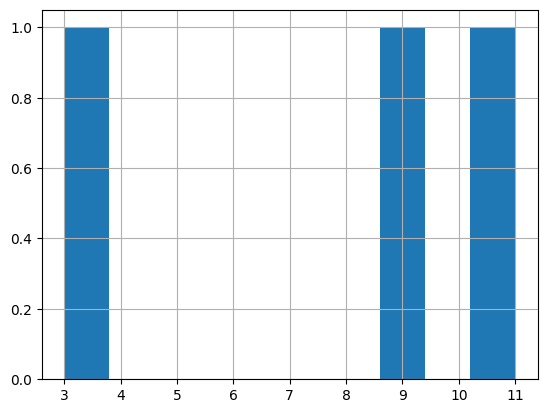

In [24]:
"""
Skew is a summary statistic that measures how the tails behave. A
normal distribution should have a skew around 0. A negative skew
indicates that the left tail is longer, whereas a positive skew indicates that
the right tail is longer. Below is a plot of the histogram:

"""
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
songs_66.hist(ax=ax)
fig.savefig('/tmp/song-hist.png')


In [25]:
songs_66.skew()

-1.293342780733397

In [26]:
"""
Kurtosis is a summary measure that describes how narrow the “peak” of
is distribution is. The larger the number, the narrower the peak is.
Normally, this value is reported alongside skew. The .kurt method returns
nan if there are fewer than four numbers:

"""
songs_66.kurt()

nan

In [28]:
songs_69 = pd.Series([18, 22, 7, 5],
                      index=[ 'John', 'Paul', 'George', 'Ringo'],
                      name='Counts')


In [29]:
"""
Covariance is a measure of how two variables change together. If they
tend to increase together, it will be positive. If one tends to decrease while
the other increases, it will be negative:

"""
songs_66.cov(songs_69)

28.333333333333332

In [31]:
"""
When the covariance is normalized (by dividing by the standard
deviations of both series), it is called the correlation coefficient. The .corr
method gives the Pearson Correlation Coefficient. This value is a number
from -1 to 1. The more positive this value is, the greater the correlation.
The more negative it is, the greater the inverse correlation. A value of zero
indicates no correlation:

"""
songs_66.corr(songs_69)

0.8761489936497804

In [38]:
"""
The autocorrelation measure describes the correlation of a series with
itself shifted one position. 1 indicates perfect correlation, and -1 indicates
anti-correlation. Here is another case where the sample size is small, so
take these with a grain of salt. Note that .autocorr does not ignore NaN
by default:

"""
songs_66.autocorr()

nan

In [39]:
songs_66.dropna().autocorr()

-0.9999999999999999

## Convert **Types**

In [40]:
songs_66.round()

George     3.0
Ringo      NaN
John      11.0
Paul       9.0
Name: Counts, dtype: float64

In [41]:
"""
Note that even though the value is rounded, the type is still a float.
Numbers can be clipped between lower and upper thresholds using the
.clip method. This method does not change the type either:

"""
songs_66.clip(lower=80, upper = 90)

George    80.0
Ringo      NaN
John      80.0
Paul      80.0
Name: Counts, dtype: float64

In [45]:
"""
The .astype method attempts to convert values to the type passed in. In
the instance below, the float values are being converted to strings. To the
unwary, there does not appear to be much change other than the dtype
changing to object:
"""
songs_66.astype(str)

George     3.0
Ringo      nan
John      11.0
Paul       9.0
Name: Counts, dtype: object

In [47]:
"""
But, if a method is invoked on the converted string values, the result
might not be the desired output. In this case .max now returns the
lexicographic maximum:
"""
songs_66.astype(str).max()

'nan'